# Oyo hotel rooms EDA
Dataset: https://www.kaggle.com/datasets/sonu1maheshwari/oyo-hotel-rooms

# Importing Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.25)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
df = pd.read_csv("/kaggle/input/oyo-hotel-rooms/OYO_HOTEL_ROOMS.csv")

In [6]:
df

,Unnamed: 0,Hotel_name,Location,Price,Discount,Rating
0,0,Capital O 80951 Hotel Radisson Suite,"India, Mumbai",2819.0,65% off,104.0
1,1,OYO SilverKey Hotel Manas Residency,"Chembur East, Mumbai",2702.0,65% off,410.0
2,2,OYO Hotel Airport Metro Near Chhatrapati Shiva...,"Andheri East, Mumbai",2289.0,64% off,879.0
3,3,Collection O Hotel Kiwi International Near Chh...,"Andheri East, Mumbai",2094.0,66% off,75.0
4,4,OYO Druv's Taj Palace Near Chhatrapati Shivaji...,"Near Asalpha Metro Station, Dhumai Estate, Mumbai",2656.0,65% off,686.0
...,...,...,...,...,...,...
455,455,Flagship New Silver Inn,"Near Tagore Park, Tijala, Kolkata",NaN,NaN,NaN
456,456,Flagship Tinker Bell Near Acropolis Mall,"Mukundapur, Kolkata",NaN,NaN,NaN
457,457,OYO Flagship Hotel Suleman Palace Near St. Tho...,"Bux Lane, Kolkata",NaN,NaN,NaN
458,458,Flagship Rakhakali Guest House Fooding And Loding,"near Shalimar station ticket counter , Kolkata",NaN,NaN,NaN


In [7]:
df.drop(columns=["Unnamed: 0"],inplace=True)
df.columns = df.columns.str.lower()

# Descriptive Analysis

In [8]:
df.shape

(460, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hotel_name  460 non-null    object 
 1   location    460 non-null    object 
 2   price       418 non-null    float64
 3   discount    418 non-null    object 
 4   rating      438 non-null    float64
dtypes: float64(2), object(3)
memory usage: 18.1+ KB


In [10]:
df.isna().sum()

hotel_name     0
location       0
price         42
discount      42
rating        22
dtype: int64

In [11]:
df.describe()

,price,rating
count,418.000000,438.000000
mean,1290.191388,620.636986
std,550.144661,934.922813
min,449.000000,1.000000
25%,909.250000,61.250000
50%,1206.000000,266.500000
75%,1497.500000,826.750000
max,4069.000000,7398.000000


In [12]:
df.dropna(inplace=True)

In [13]:
filt_loc = df.location.str.contains(",")
F_index = filt_loc.loc[lambda x : x==False].index
df.drop(index=F_index,inplace=True)
df.reset_index(drop=True,inplace=True)

In [14]:
df['city'] = df.location.apply(lambda x: x.rsplit(",",1)[1])

# EDA

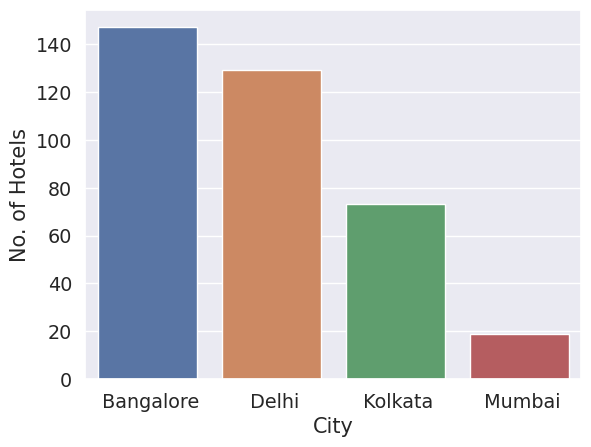

In [15]:
myplot_city = sns.barplot(x=df.city.value_counts().index[:4],y=df.city.value_counts()[:4])
myplot_city.set(xlabel='City',ylabel='No. of Hotels')
plt.show()

#### Dataset conatins data for 4 major cities in India

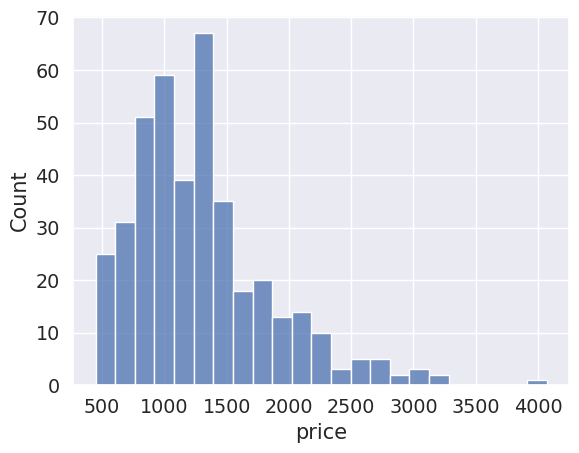

In [17]:
myplot_price = sns.histplot(df.price)
plt.show()

In [18]:
df[(df.price>800) & (df.price<1400)].shape[0]/df.shape[0]

0.5136476426799007

#### 50% of the rooms are priced between 800 to 1400 Rs per night

In [19]:
df.price.mean()

1297.1116625310174

In [20]:
df.price.median()

1213.0

#### Average price of room per night across all 4 cities is around 1300 Rs

# Bangalore

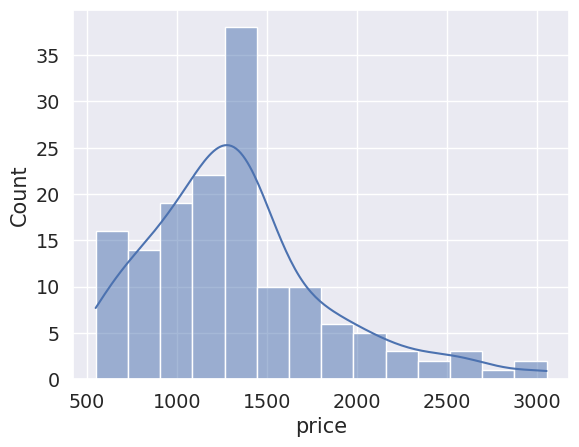

In [21]:
grp_Bangalore = df[df.city.str.contains('Bangalore')]
sns.histplot(grp_Bangalore.price,kde=True)
plt.show()

In [22]:
print(f"The mean price is {grp_Bangalore.price.mean()}\nThe median price is {grp_Bangalore.price.median()}")

The mean price is 1330.476821192053
The median price is 1282.0


# Delhi

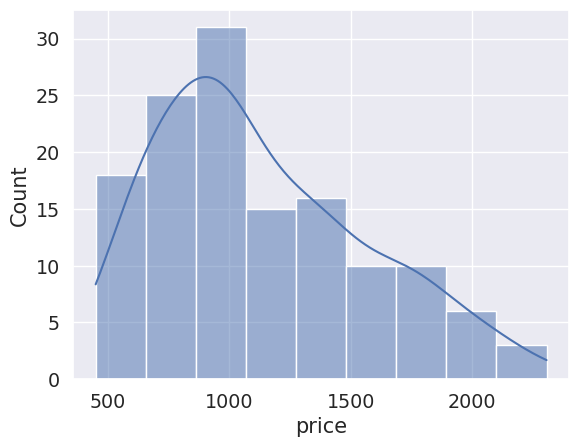

In [23]:
grp_Delhi = df[df.city.str.contains('Delhi')]
sns.histplot(grp_Delhi.price,kde=True)
plt.show()

In [24]:
print(f"The mean price is {grp_Delhi.price.mean()}\nThe median price is {grp_Delhi.price.median()}")

The mean price is 1133.6268656716418
The median price is 1005.0


# Kolkata

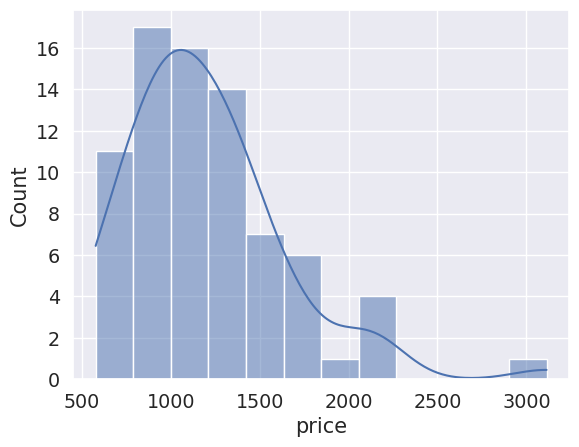

In [25]:
grp_Kolkata = df[df.city.str.contains('Kolkata')]
sns.histplot(grp_Kolkata.price,kde=True)
plt.show()

In [26]:
print(f"The mean price is {grp_Kolkata.price.mean()}\nThe median price is {grp_Kolkata.price.median()}")

The mean price is 1195.1688311688313
The median price is 1099.0


# Mumbai

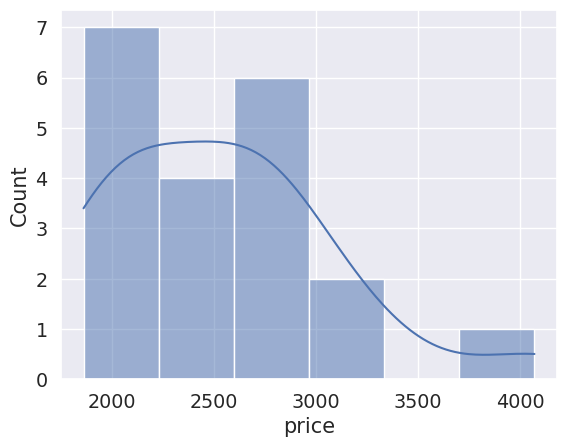

In [27]:
grp_Mumbai = df[df.city.str.contains('Mumbai')]
sns.histplot(grp_Mumbai.price,kde=True)
plt.show()

In [28]:
print(f"The mean price is {grp_Mumbai.price.mean()}\nThe median price is {grp_Mumbai.price.median()}")

The mean price is 2534.1
The median price is 2532.5


# Summary

Dataset conatins data for 4 major cities in India
1. Bangalore
2. Delhi
3. Kolkata
4. Mumbai

50% of the rooms are priced between 800 to 1400 Rs per night

Average price of room per night across all 4 cities is around 1300 Rs

Average price of room per nigh is highest in Mumbai(2534 Rs) and lowest in Delhi(1133 Rs)